In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import imageio

from model_training import *


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


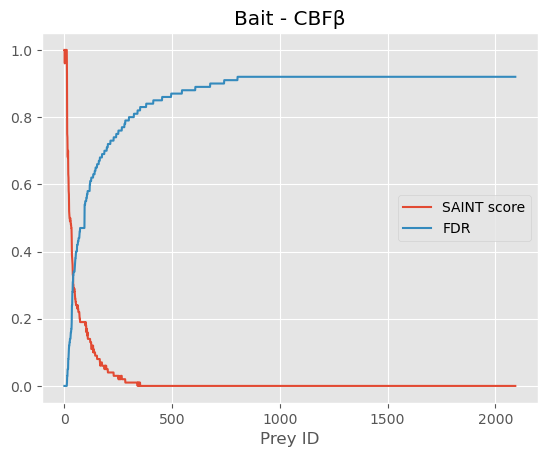

In [2]:
plot_saint_fdr(cb, title=title)
# Look at the distribution of adjacency matices As

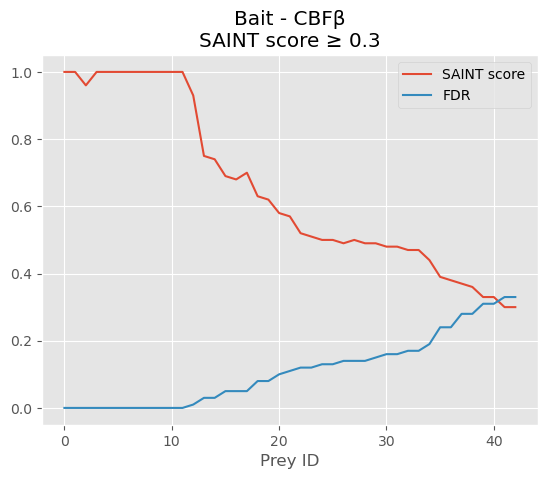

In [3]:
plot_saint_fdr(cb_train, title=title2)

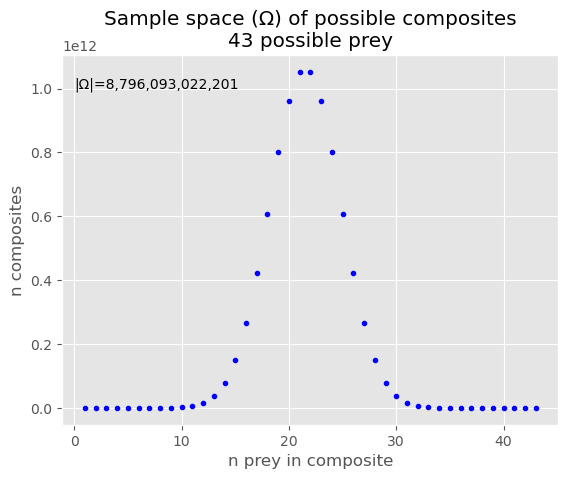

In [4]:
mp.plot_sample_space(Ss, textx=0, texty=1e12)

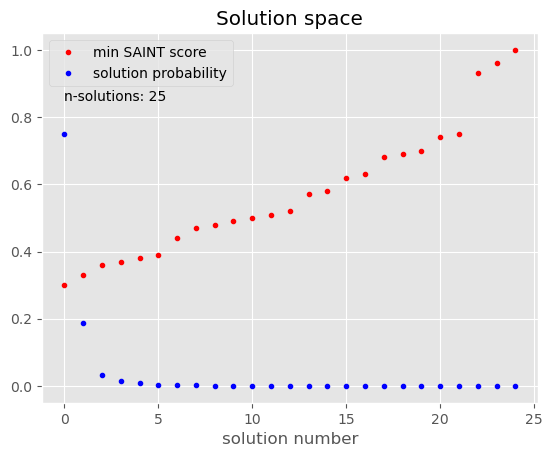

In [5]:
mp.plot_solution_space(Ss)

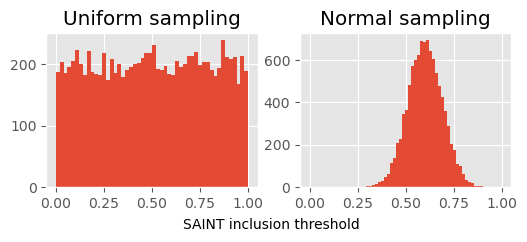

In [6]:
mp.plot_samples(Ss)

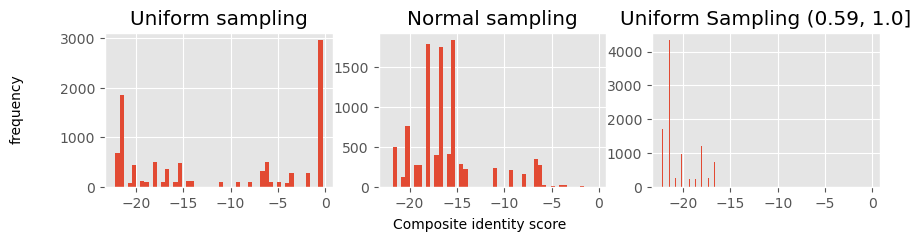

In [7]:
mp.plot_triple_samples(Ss)

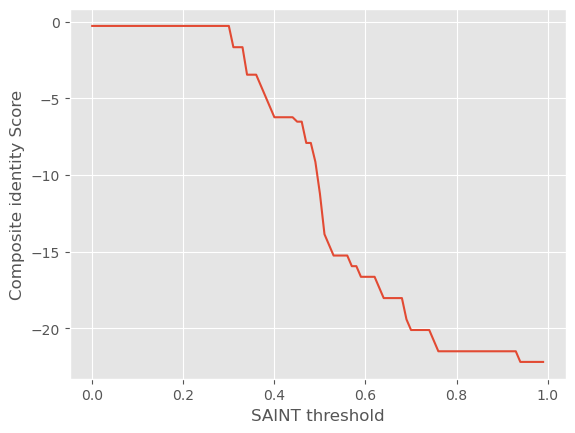

In [8]:
mp.plot_score_saint(Ss)

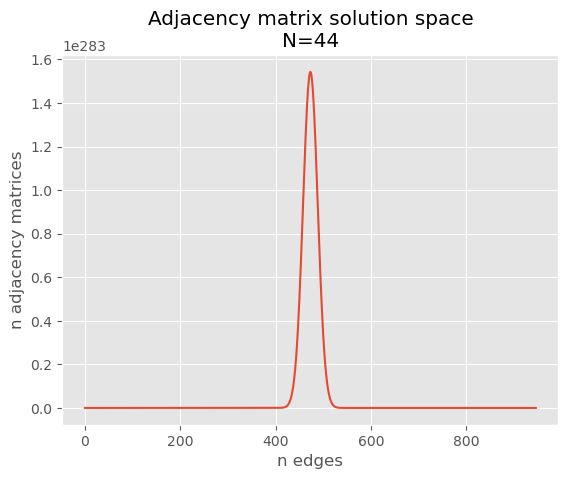

In [9]:
# Now what about enumerating Adjacency matrices?

_ = mp.plot_As_solution_space(44)

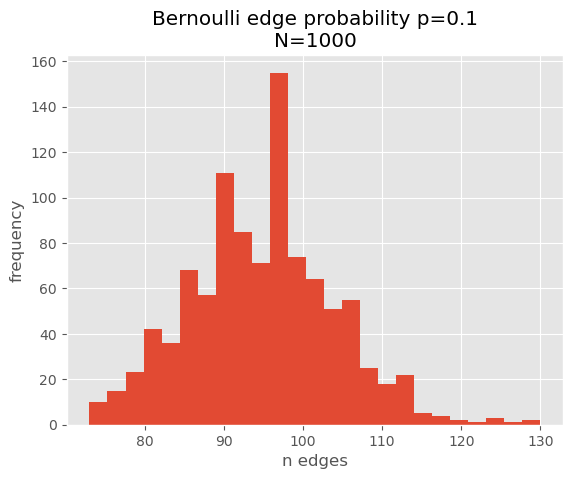

In [10]:
plot_edge_density(rseed=13, p=p, n_examples=n_examples)

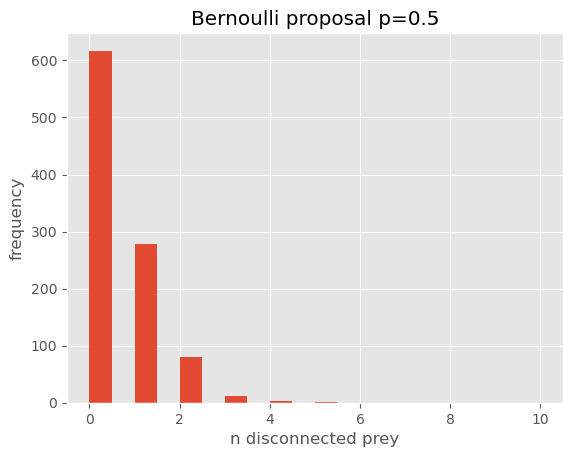

In [11]:
plot_disconnectivity(rseed=13, p=p, n_examples=n_examples)

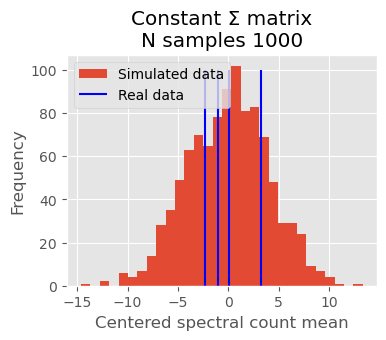

In [12]:
# Selecting the Wishart priors
# 
#V = get_scale_matrix_V(cb_train, scatter_diag_scaler=0.1)
#z = mp._move_Sigma_inv(key, V, 43, 43)

# Prior predictive distribtuion for this scatter matrix

mover_training = MoverTraining(rseed=13, cb_train=cb_train, nsamples=1000, style='ggplot')    
mover_training.plot_mean_sim()

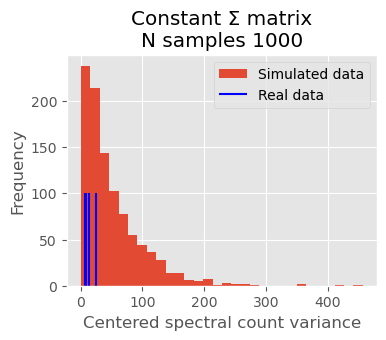

In [13]:
mover_training.plot_var_sim()

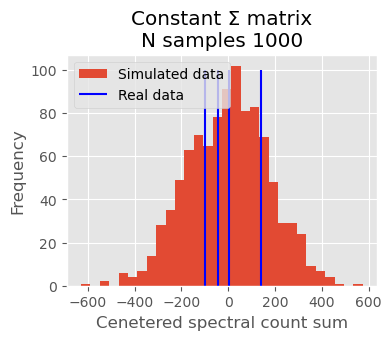

In [14]:
mover_training.plot_sum_sim()

In [15]:
# Conclusion - the choice of the scatter matrix is reasonable

# Do an Experiment where we sample Covaraiance matrices and then sample data

m43, v43, ss43 = do_sampled_sigma_experiment(1000, 43, 13)
m50, v50, ss50 = do_sampled_sigma_experiment(1000, 50, 13)

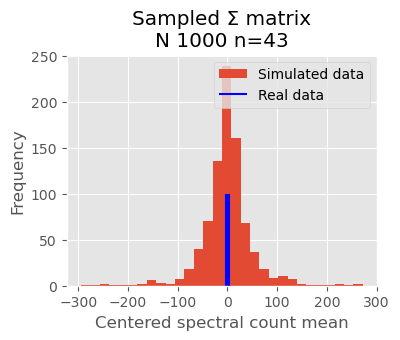

In [16]:
t0 = u'Sampled \u03A3 matrix' + f'\nN {mover_training.nsamples} n='
mover_training.mean_plot(np.array(m43), title=t0 + '43')

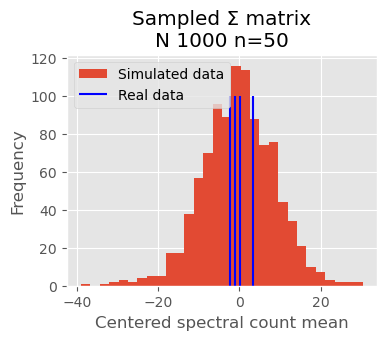

In [17]:
mover_training.mean_plot(np.array(m50), title=t0 + '50')

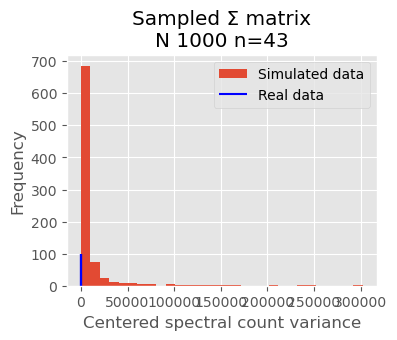

In [18]:
tv = u'Sampled \u03A3 matrix' + f'\nN {mover_training.nsamples} n='
mover_training.var_plot(v43,title=tv + '43')

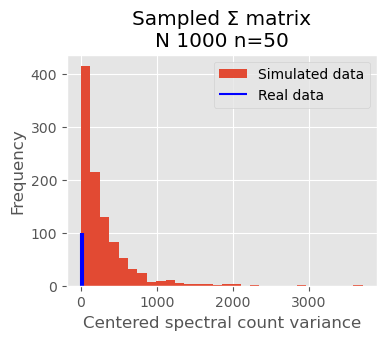

In [19]:
mover_training.var_plot(v50, title=tv + '50')

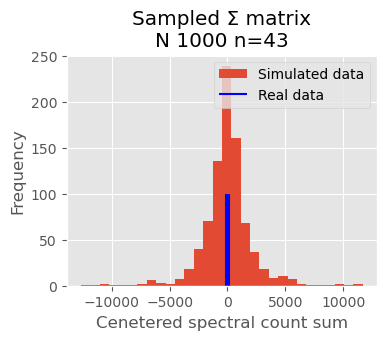

In [20]:
ts = u'Sampled \u03A3 matrix' + f'\nN {mover_training.nsamples} n='
mover_training.sum_plot(np.array(ss43), title=ts + '43')

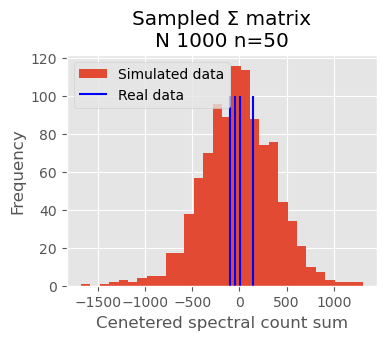

In [21]:
mover_training.sum_plot(np.array(ss50), title=ts + '50')

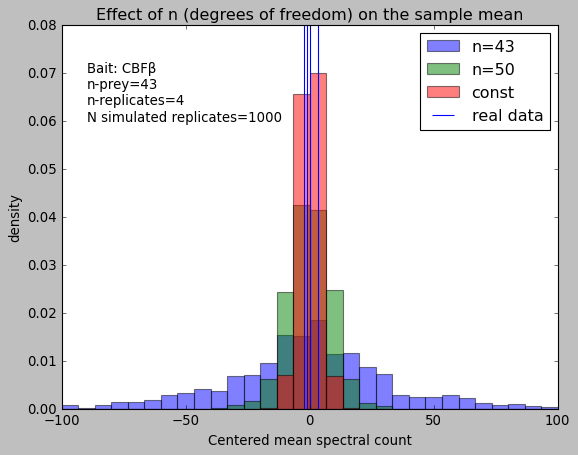

In [22]:
plot_wishart_dof_effect(m43, m50, mover_training.mean_sim, mover_training)

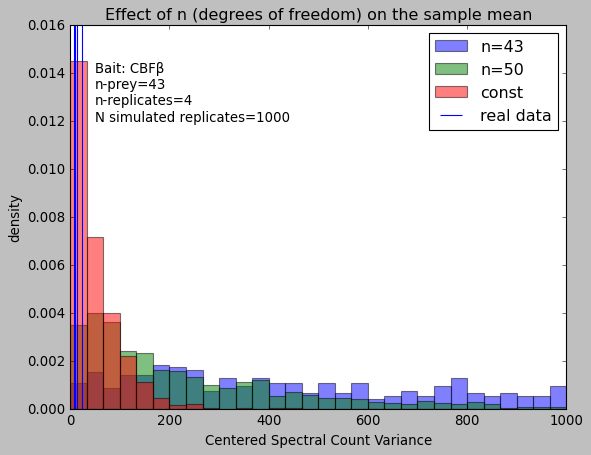

In [23]:
plot_wishart_dof_effect(v43, v50,
                        mover_training.var_sim,
                        mover_training,
                        nbins=30,
                        xmin=0,
                        xmax=1000,
                        xlabel="Centered Spectral Count Variance",
                        density=True, alpha=0.5,
                        textx=50, texty=0.012,
                        ymin=0, ymax=0.016,
                        vlines_operator=np.var)

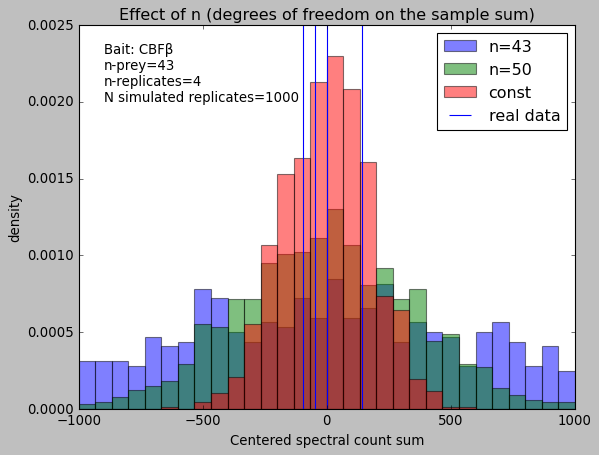

In [24]:
plot_wishart_dof_effect(ss43, ss50,
                       mover_training.sum_sim,
                       mover_training,
                       vlines_operator=np.sum, nbins=30, 
                       xmin=-1000, xmax=1000,
                       textx=-900, texty=0.002,
                       ymin=0, ymax=0.0025,
                       title="Effect of n (degrees of freedom on the sample sum)",
                       xlabel="Centered spectral count sum")

In [2]:
# Let's understand the training data and benchmark

cb_all = cb_test.CullinBenchMark(cb_path)
df_all_03 = get_saint_threshold(cb_all, 0.3)
df_all_05 = get_saint_threshold(cb_all, 0.5)
analysis_all = CullinBenchMarkAnalysis(cb_all.data)
analysis_all_03 = CullinBenchMarkAnalysis(df_all_03)

/home/aji/Projects/dev/pynet/pyext/src/model_training.py:749: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.loc[:, "organism"] = organisms


In [3]:
analysis_all

n conditions    6555
  viral    17    (0.26)%    
  human    6,535    (99.69)% 
  mouse    3    (0.05)%

n unique prey: 2,855
  viral    7    (0.25)% 
  human    2,847    (99.72)%
  mouse    1    (0.04)%


n bait    3
n uid     2,847
n nuid    8

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     True
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       2,855
n possible pairs       4,074,085

        

In [22]:
d = pd.DataFrame()

d['viral'] = [3, 2.61]
d['human'] = [112, 97.39]
d['mouse'] = [0, 0.0]

In [3]:
t = 1.0
df_t = get_saint_threshold(cb_all, t)
analysis_t = CullinBenchMarkAnalysis(df_t)
analysis_t

n conditions    115
  viral    3    (2.61)%    
  human    112    (97.39)% 
  mouse    0    (0.0)%

n unique prey: 85
  viral    1    (1.18)% 
  human    84    (98.82)%
  mouse    0    (0.0)%


n bait    3
n uid     84
n nuid    1

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     False
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       85
n possible pairs       3,570

        

In [5]:
analysis_all.organism_tree['MOUSE']

AttributeError: 'CullinBenchMarkAnalysis' object has no attribute 'organism_tree'

In [ ]:
analysis_all.not_uid_set

In [23]:
analysis_all_03

n conditions    359
  viral    3    (0.84)%    
  human    356    (99.16)% 
  mouse    0    (0.0)%

n unique prey: 295
  viral    1    (0.34)% 
  human    294    (99.66)%
  mouse    0    (0.0)%


n bait    3
n uid     294
n nuid    1

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     False
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       295
n possible pairs       43,365

        

In [9]:
CullinBenchMarkAnalysis(df_all_05)

n prey: 177
n bait: 3
n uid : 176
n nuid: 1

ELOB in prey set    True
CBFB in prey set    True
CUL5 in prey set    True
        

In [20]:
True & True & True

True

In [13]:
'Q13951' 

True

In [18]:
analysis_all.data.loc[analysis_all.data['Prey'] == 'Q13951', :]

,Bait,Prey,PreyGene,Spec,SpecSum,AvgSpec,NumReplicates,ctrlCounts,AvgP,MaxP,TopoAvgP,TopoMaxP,SaintScore,FoldChange,BFDR
7,CBFBwt_MG132,Q13951,PEBB_HUMAN,42|46|29|48,165,41.25,4,0|3|3|3|0|0|5|3|0|0|0|0,1.00,1.0,1.00,1.0,1.00,29.12,0.0
2125,CUL5wt_MG132,Q13951,PEBB_HUMAN,24|16|16|24,80,20.00,4,0|3|3|3|0|0|5|3|0|0|0|0,0.99,1.0,0.99,1.0,0.99,14.12,0.0
4473,ELOBwt_MG132,Q13951,PEBB_HUMAN,33|27|23|24,107,26.75,4,0|3|3|3|0|0|5|3|0|0|0|0,1.00,1.0,1.00,1.0,1.00,18.88,0.0


In [3]:
analysis_all_03

n prey: 295
n bait: 3
n uid : 294
n nuid: 1

ELOB in prey set    True
CBFB in prey set    False
CUL5 in prey set    True
        

In [9]:
set(analysis_all_03.data['PreyGene'])

{'2AAB_HUMAN',
 '4F2_HUMAN',
 'ACACA_HUMAN',
 'ACAP1_HUMAN',
 'ACTN1_HUMAN',
 'ACTN4_HUMAN',
 'AFG32_HUMAN',
 'AKP8L_HUMAN',
 'AMN1_HUMAN',
 'AMRA1_HUMAN',
 'ANKR9_HUMAN',
 'ANR39_HUMAN',
 'ANXA1_HUMAN',
 'AP3B2_HUMAN',
 'APBP2_HUMAN',
 'APC11_HUMAN',
 'APOL2_HUMAN',
 'ARHG1_HUMAN',
 'ARHG6_HUMAN',
 'ARI1_HUMAN',
 'ARI2_HUMAN',
 'ARRB2_HUMAN',
 'ASB13_HUMAN',
 'ASB1_HUMAN',
 'ASB3_HUMAN',
 'ASB6_HUMAN',
 'ASB7_HUMAN',
 'ASB8_HUMAN',
 'ASB9_HUMAN',
 'BACH_HUMAN',
 'BAF_HUMAN',
 'BAG3_HUMAN',
 'BAG5_HUMAN',
 'BAG6_HUMAN',
 'BC11B_HUMAN',
 'BCCIP_HUMAN',
 'CAND1_HUMAN',
 'CD3G_HUMAN',
 'CDC73_HUMAN',
 'CDK5_HUMAN',
 'CELF2_HUMAN',
 'CH3L2_HUMAN',
 'CHRD1_HUMAN',
 'CISH_HUMAN',
 'CK5P3_HUMAN',
 'CLPB_HUMAN',
 'CNDD3_HUMAN',
 'CNPY3_HUMAN',
 'COG7_HUMAN',
 'COX5A_HUMAN',
 'CSK_HUMAN',
 'CSN1_HUMAN',
 'CSN2_HUMAN',
 'CSN3_HUMAN',
 'CSN4_HUMAN',
 'CSN5_HUMAN',
 'CSN6_HUMAN',
 'CSN7A_HUMAN',
 'CSN7B_HUMAN',
 'CSN8_HUMAN',
 'CTR9_HUMAN',
 'CUL2_HUMAN',
 'CUL3_HUMAN',
 'CUL4A_HUMAN',
 'CUL4B_HUM

In [4]:
analysis_all_03.data

,Bait,Prey,PreyGene,Spec,SpecSum,AvgSpec,NumReplicates,ctrlCounts,AvgP,MaxP,TopoAvgP,TopoMaxP,SaintScore,FoldChange,BFDR
0,CBFBwt_MG132,vifprotein,vifprotein,22|22|26|34,104,26.00,4,0|0|1|1|0|1|3|2|1|0|0|0,1.00,1.00,1.00,1.00,1.00,34.67,0.00
1,CBFBwt_MG132,Q9UBF6,RBX2_HUMAN,9|11|12|16,48,12.00,4,0|0|0|0|0|0|0|0|1|0|0|0,1.00,1.00,1.00,1.00,1.00,120.00,0.00
2,CBFBwt_MG132,Q9C0K0,BC11B_HUMAN,8|8|26|27,69,17.25,4,0|2|2|0|3|1|1|0|4|3|1|1,0.96,1.00,0.96,1.00,0.96,11.50,0.00
3,CBFBwt_MG132,Q93034,CUL5_HUMAN,78|77|66|99,320,80.00,4,0|0|0|0|0|0|0|1|0|0|1|0,1.00,1.00,1.00,1.00,1.00,480.00,0.00
4,CBFBwt_MG132,Q8TEB1,DCA11_HUMAN,24|19|15|11,69,17.25,4,0|0|0|0|0|1|3|0|1|0|1|0,1.00,1.00,1.00,1.00,1.00,34.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,ELOBwt_MG132,O75600,KBL_HUMAN,2|1|4|2,9,2.25,4,1|0|0|0|2|0|0|0|0|0|1|1,0.31,0.89,0.31,0.89,0.31,5.40,0.32
4601,ELOBwt_MG132,Q9Y6K9,NEMO_HUMAN,3|0|1|3,7,1.75,4,1|0|0|1|0|2|0|0|0|0|0|0,0.30,0.59,0.30,0.59,0.30,5.25,0.33
4602,ELOBwt_MG132,Q96R06,SPAG5_HUMAN,2|1|3|4,10,2.50,4,0|0|0|2|2|0|1|0|1|0|0|0,0.30,0.69,0.30,0.69,0.30,5.00,0.33
4603,ELOBwt_MG132,Q5H9R7,PP6R3_HUMAN,2|2|7|5,16,4.00,4,2|3|0|0|4|1|0|1|1|1|2|2,0.30,0.87,0.30,0.87,0.30,2.82,0.33


In [10]:
cb_03_bench.data

,Bait,Prey,PreyGene,Spec,SpecSum,AvgSpec,NumReplicates,ctrlCounts,AvgP,MaxP,...,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12
0,CBFBwt_MG132,vifprotein,vifprotein,22|22|26|34,104,26.00,4,0|0|1|1|0|1|3|2|1|0|0|0,1.00,1.00,...,1,1,0,1,3,2,1,0,0,0
1,CBFBwt_MG132,Q9UBF6,RBX2_HUMAN,9|11|12|16,48,12.00,4,0|0|0|0|0|0|0|0|1|0|0|0,1.00,1.00,...,0,0,0,0,0,0,1,0,0,0
2,CBFBwt_MG132,Q9C0K0,BC11B_HUMAN,8|8|26|27,69,17.25,4,0|2|2|0|3|1|1|0|4|3|1|1,0.96,1.00,...,2,0,3,1,1,0,4,3,1,1
3,CBFBwt_MG132,Q93034,CUL5_HUMAN,78|77|66|99,320,80.00,4,0|0|0|0|0|0|0|1|0|0|1|0,1.00,1.00,...,0,0,0,0,0,1,0,0,1,0
4,CBFBwt_MG132,Q8TEB1,DCA11_HUMAN,24|19|15|11,69,17.25,4,0|0|0|0|0|1|3|0|1|0|1|0,1.00,1.00,...,0,0,0,1,3,0,1,0,1,0
5,CBFBwt_MG132,Q15370,ELOB_HUMAN,23|23|24|33,103,25.75,4,4|2|2|3|5|4|6|3|5|4|3|4,1.00,1.00,...,2,3,5,4,6,3,5,4,3,4
6,CBFBwt_MG132,Q15369,ELOC_HUMAN,17|19|18|21,75,18.75,4,2|4|2|2|2|2|7|4|4|4|5|4,1.00,1.00,...,2,2,2,2,7,4,4,4,5,4
7,CBFBwt_MG132,Q13951,PEBB_HUMAN,42|46|29|48,165,41.25,4,0|3|3|3|0|0|5|3|0|0|0|0,1.00,1.00,...,3,3,0,0,5,3,0,0,0,0
8,CBFBwt_MG132,Q13950,RUNX2_HUMAN,5|10|8|14,37,9.25,4,0|0|0|0|0|0|0|0|0|0|0|0,1.00,1.00,...,0,0,0,0,0,0,0,0,0,0
9,CBFBwt_MG132,Q13761,RUNX3_HUMAN,7|12|11|10,40,10.00,4,0|0|0|0|0|0|0|0|0|0|0|0,1.00,1.00,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cb.data

,Bait,Prey,PreyGene,Spec,SpecSum,AvgSpec,NumReplicates,ctrlCounts,AvgP,MaxP,...,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12
0,CBFBwt_MG132,vifprotein,vifprotein,22|22|26|34,104,26.00,4,0|0|1|1|0|1|3|2|1|0|0|0,1.00,1.0,...,1,1,0,1,3,2,1,0,0,0
1,CBFBwt_MG132,Q9UBF6,RBX2_HUMAN,9|11|12|16,48,12.00,4,0|0|0|0|0|0|0|0|1|0|0|0,1.00,1.0,...,0,0,0,0,0,0,1,0,0,0
2,CBFBwt_MG132,Q9C0K0,BC11B_HUMAN,8|8|26|27,69,17.25,4,0|2|2|0|3|1|1|0|4|3|1|1,0.96,1.0,...,2,0,3,1,1,0,4,3,1,1
3,CBFBwt_MG132,Q93034,CUL5_HUMAN,78|77|66|99,320,80.00,4,0|0|0|0|0|0|0|1|0|0|1|0,1.00,1.0,...,0,0,0,0,0,1,0,0,1,0
4,CBFBwt_MG132,Q8TEB1,DCA11_HUMAN,24|19|15|11,69,17.25,4,0|0|0|0|0|1|3|0|1|0|1|0,1.00,1.0,...,0,0,0,1,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,CBFBwt_MG132,A6NHR9,SMHD1_HUMAN,1|2|0|0,3,0.75,4,3|2|2|0|0|4|8|4|3|5|1|5,0.00,0.0,...,2,0,0,4,8,4,3,5,1,5
2090,CBFBwt_MG132,A6NHL2,TBAL3_HUMAN,1|1|0|0,2,0.50,4,1|0|0|0|0|0|0|0|0|0|0|0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2091,CBFBwt_MG132,A6NC57,ANR62_HUMAN,0|0|1|0,1,0.25,4,0|0|0|0|0|0|0|0|0|0|0|0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2092,CBFBwt_MG132,A4UGR9,XIRP2_HUMAN,0|1|0|0,1,0.25,4,0|0|0|0|0|0|0|0|0|1|0|0,0.00,0.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Create the proposal distribution

In [ ]:
# plot a move of edges moving
A = M['As']
kernal = partial(mp._move_edges_j, n_edges = 11, n=len(A))
kernal = jax.jit(kernal)

n_frames = 100
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, n_frames)
a = A

def create_frame(t, a):
    fig = plt.figure()
    a = kernal(keys[t], a, prob=0.5)
    a = np.array(a)
    
    plt.imshow(a)
    plt.title('Random Edge Sampling')
    plt.xlabel('j')
    plt.ylabel('i')
    plt.savefig(f'./img/03_log_composite_connectivity_prior__adjacency_example_{t}.png')
    plt.close()
    return a
    
for t in range(n_frames):
    a = create_frame(t, a)
    
frames = []
for t in range(n_frames):
    image = imageio.v2.imread(f'./img/03_log_composite_connectivity_prior__adjacency_example_{t}.png')
    frames.append(image)

# combine frames into a gif

In [ ]:
imageio.mimsave('./gif/03_log_composite_connectivity_prior__adjacency_example.gif', frames, fps=5)

In [ ]:
from IPython.display import Image

![SegmentLocal](./gif/03_log_composite_connectivity_prior__adjacency_example.gif "segment")

In [ ]:
%%bash
ls ./gif

In [ ]:
a = create_frame(0, a)

In [ ]:
# Example GIF
import imageio
from IPython.display import Image
Image(filename="./img/img_0.png")
x = [1, 2, 3, 4, 4, 4, 4, 3, 2, 1, 1, 1, 1]
y = [1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 3, 2, 1]
time = list(range(13))
def create_frame(t):
    fig = plt.figure(figsize=(6, 6))    
    plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    plt.xlim([0,5])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([0,5])
    plt.ylabel('y', fontsize = 14)
    plt.title(f'Relationship between x and y at step {t}',
              fontsize=14)    
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )    
    plt.close()


create_frame(0)

# create a bunch of frames
for t in time:
    create_frame(t)

frames = []
for t in time:
    image = imageio.v2.imread(f"./img/img_{t}.png")
    frames.append(image)

# combine frames into a gif

imageio.mimsave('./gif/example.gif', frames, fps=5)

![SegmentLocal](./gif/example.gif "segment")

In [ ]:
plt.show('./img/img_0.png')

In [ ]:
# Plotting code

import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = '/home/aji/anaconda3/envs/pynetp3.10.0/bin/ffmpeg'


fig, ax = plt.subplots()
im = ax.imshow(A)

n_frames = 100
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, n_frames)
def init():
    return im

def func(frame):
    
    index = int(frame)
    a = kernal(keys[index], a, prob=0.5)
    a = np.array(a)
    im.set_data(a)
    return im

ani = animation.FuncAnimation(fig, func, data_gen, interval=n_frames, init_func=init,
                              save_count=100)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
mp._move_edges_j(key, A, prob=0.5, n_edges=2, n=10)

In [ ]:
def init():
    A = np.array(A)
    im = ax.imshow(A)
    return im
    
def func(A):
    A = np.array(A)
    im = ax.imshow(A)
    return im

#for frame in range(n_frames):
    #a = kernal(keys[frame], a, prob=0.5)
    

ani = animation.FuncAnimation(fig, func, data_gen, interval=100, init_func=init,
                              save_count=100)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
?ax.imshow


In [ ]:


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init,
                              save_count=1000)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
?animation.FuncAnimation

In [ ]:
plt.show(ani)

In [ ]:
%%bash
which ffmpeg

In [ ]:
loc = 0.6
scale = 0.08
x = np.arange(-1 + loc, 1.1 + loc, 0.1)
plt.plot(x, sp.stats.norm.logpdf(x, loc=loc, scale=scale))

In [ ]:
Ak = np.tril(A, k=-1)
U = np.triu(np.ones((44, 44)))
Ak = Ak + U

In [ ]:
plt.imshow(Ak)

In [ ]:
i_s, j_s = np.where(Ak == 0)

In [ ]:
A[i_s, j_s]

In [ ]:
cb.data.loc[:, ["r1", "r2", "r3", "r4"]].values

In [ ]:
mp.d(np.zeros((44, 44), dtype=int), np.arange(44))

In [ ]:
lambdas = [0.1, 1, 10]
def gen_data(lambda_s, density=False):
    ys = []
    xs = []
    for i in range(1, len(A)+1):
        Cs = np.arange(i)

        n_dis = m.d(A, Cs)
        score = m.log_pdf_As__Cs_lambda_s(A, Cs, lambda_s)
        ys.append(score)
        xs.append(n_dis)
    if density:
        xs = xs
        ys = np.exp(ys)
    return xs, ys
        
density = True
xs, ys = gen_data(0.1, density=density)
xs_1, ys_1 = gen_data(1, density=density)
xs_10, ys_10 = gen_data(2, density=density)


In [ ]:
def plot_composite_connectivity():
    plt.title("Composite connectivity restraint")
    plt.style.use('ggplot')
    plt.plot(xs, ys, 'g.', label=u'\u03BB 0.1')
    plt.plot(xs_1, ys_1, 'r.', label=u'\u03BB 1')
    plt.plot(xs_10, ys_10, 'b.', label=u'\u03BB 10')
    plt.xlabel('Disconnected prey')
    plt.ylabel('P(As | Cs, lambda_s)')
    plt.legend()

In [ ]:
def a(x):
    return x + 1

def b(x):
    return x + x

c = jax.jit(a)
d = jax.jit(lambda x: a(b(x)))
e = jax.jit(lambda x: c(b(x)))

In [ ]:
jax.make_jaxpr(d)(2)

In [ ]:
# Conclusion - jitting an inner function and then 
jax.make_jaxpr(e)(2)

##### plt.title("Composite connectivity log density")
plt.style.use('ggplot')
plt.plot(xs, np.log(ys), 'g-', label=u'\u03BB 0.1')
plt.plot(xs_1, np.log(ys_1), 'r-', label=u'\u03BB 1')
plt.plot(xs_10, np.log(ys_10), 'b-', label=u'\u03BB 10')
plt.xlabel('Disconnected prey')
plt.ylabel('log P(As | Cs, lambda_s)')
plt.legend()